<a href="https://colab.research.google.com/github/NazmulHassan033/Academic-Project/blob/main/parkinson_data_of_Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier  # Boosting Algorithm
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd


data_set = pd.read_csv('parkinsons.csv')
data_set.info()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
X = data_set.drop(['name', 'status'], axis=1)
y = data_set['status']

#Bayesian optimization Codee_new


In [3]:
pip install GPyOpt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 sha256=4f42612a5abf08ab595a3b123b80bc452287cb33f980a35e27cf62d9f7ab8aac
  Stored in directory: /root/.cache/pip/wheels/72/17/52/9d818b4c60f733bf49d5cf82bc2758ebbdc57a0471137c37be
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3211204 sha256=610bb5b96919c691db5c7bb48c856a7519b60a997b2651865200c5d86b42f6b5
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102544 sha256=7334411d84e9d93ad4a3574e85

New Bayesian code from documentation

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK

define objective function for SVM

In [5]:
def objective(args):
    '''Define the loss function / objective of our model.

    We will be using an SVM parameterized by the regularization parameter C
    and the parameter gamma.

    The C parameter trades off correct classification of training examples
    against maximization of the decision function's margin. For larger values
    of C, a smaller margin will be accepted.

    The gamma parameter defines how far the influence of a single training
    example reaches, with larger values meaning 'close'.
    '''
    C, gamma = args
    model = SVC(C=10 ** C, gamma=10 ** gamma, random_state=12345)
    loss = 1 - cross_val_score(estimator=model, X=X_train, y=y_train, scoring='roc_auc', cv=3).mean()
    return {'params': {'C': C, 'gamma': gamma}, 'loss': loss, 'status': STATUS_OK }

In [40]:
#selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','Jitter:DDP', 'HNR', 'RPDE', 'spread1', 'spread2', 'PPE'] #Boruta
selected_features = ['MDVP:Fo(Hz)','MDVP:Flo(Hz)','spread1','spread2','DFA']
reduced_dataset = data_set[selected_features]
X_new = reduced_dataset

In [42]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [43]:
trials = Trials()
best = fmin(objective,
    space=[hp.uniform('C', -4., 1.), hp.uniform('gamma', -4., 1.)],
    algo=tpe.suggest,
    max_evals=1000,
    trials=trials)

100%|██████████| 1000/1000 [00:21<00:00, 46.20trial/s, best loss: 0.10059542346991746]


In [45]:
print(best)

{'C': 0.7710558949190383, 'gamma': -2.661438636778792}


#Training

In [46]:
# Extract the loss for every combination of C, gamma
results = trials.results
ar = np.zeros(shape=(1000,3))
for i, r in enumerate(results):
    C = r['params']['C']
    gamma = r['params']['gamma']
    loss = r['loss']
    ar[i] = C, gamma, loss

Accuracy: 0.9102564102564102
Precision: 0.8914728682170543
Recall: 1.0
F1 Score: 0.9426229508196722
ROC-AUC Score: 0.8292682926829268


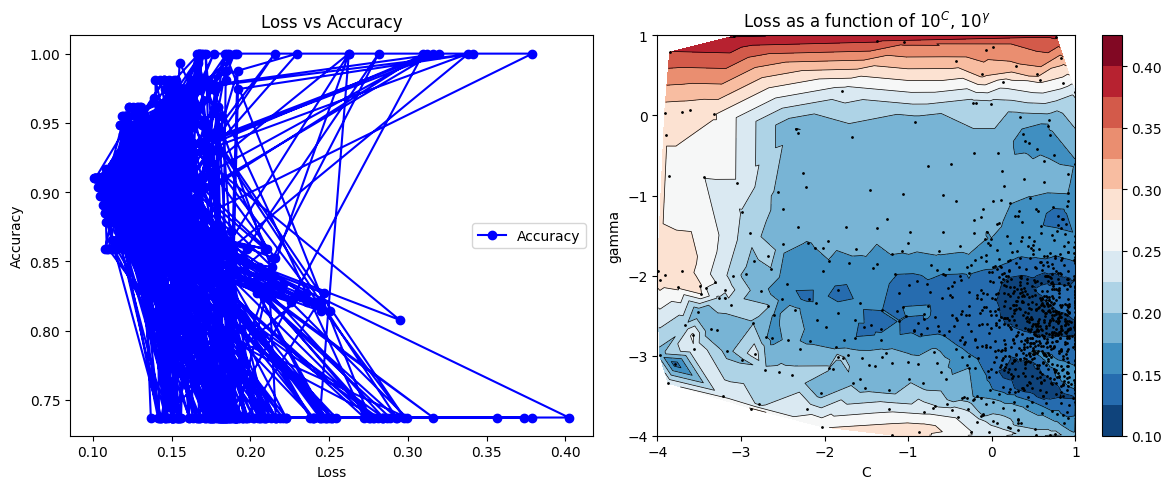

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix
from hyperopt import hp, fmin, tpe, Trials

# Load or prepare your data
# X_train, X_test, y_train, y_test = ...

# Define the objective function
#def objective(args):
    #Define the loss function / objective of our model.

    #... (Same as before) ...

  #  return {'params': {'C': C, 'gamma': gamma}, 'loss': loss, 'status': STATUS_OK }



# Extract the best hyperparameters
best_C = best['C']
best_gamma = best['gamma']

# Train the model with the best hyperparameters
best_model = SVC(C=10 ** best_C, gamma=10 ** best_gamma, random_state=12345)
best_model.fit(X_train, y_train)

# Predict on the train set
y_pred = best_model.predict(X_train)

# Calculate performance metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_train, y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_train, y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Visualization using Matplotlib
results = trials.results
ar = np.zeros(shape=(len(results), 3))
for i, r in enumerate(results):
    C = r['params']['C']
    gamma = r['params']['gamma']
    loss = r['loss']
    ar[i] = C, gamma, loss

C_values, gamma_values, loss_values = ar[:, 0], ar[:, 1], ar[:, 2]

# Calculate accuracy for each combination of C and gamma
accuracy_array = []
for i in range(len(results)):
    C = 10 ** C_values[i]
    gamma = 10 ** gamma_values[i]
    model = SVC(C=C, gamma=gamma, random_state=12345)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    accuracy_array.append(acc)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Alternative Visualization: Line Plot of Loss vs Accuracy
ax1.plot(loss_values, accuracy_array, marker='o', color='b', label='Accuracy')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Accuracy')
ax1.set_title('Loss vs Accuracy')
ax1.legend()

# Plot loss visualization
ax2.tricontour(C_values, gamma_values, loss_values, levels=14, linewidths=0.5, colors='k')
cntr = ax2.tricontourf(C_values, gamma_values, loss_values, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax2)
ax2.plot(C_values, gamma_values, 'ko', ms=1)
ax2.set(xlim=(-4, 1), ylim=(-4, 1))
ax2.set_title('Loss as a function of $10^C$, $10^\gamma$')
ax2.set_xlabel('C')
ax2.set_ylabel('gamma')

plt.tight_layout()
plt.show()


#Validation

Accuracy: 0.9230769230769231
Precision: 0.9142857142857143
Recall: 1.0
F1 Score: 0.955223880597015
ROC-AUC Score: 0.7857142857142857


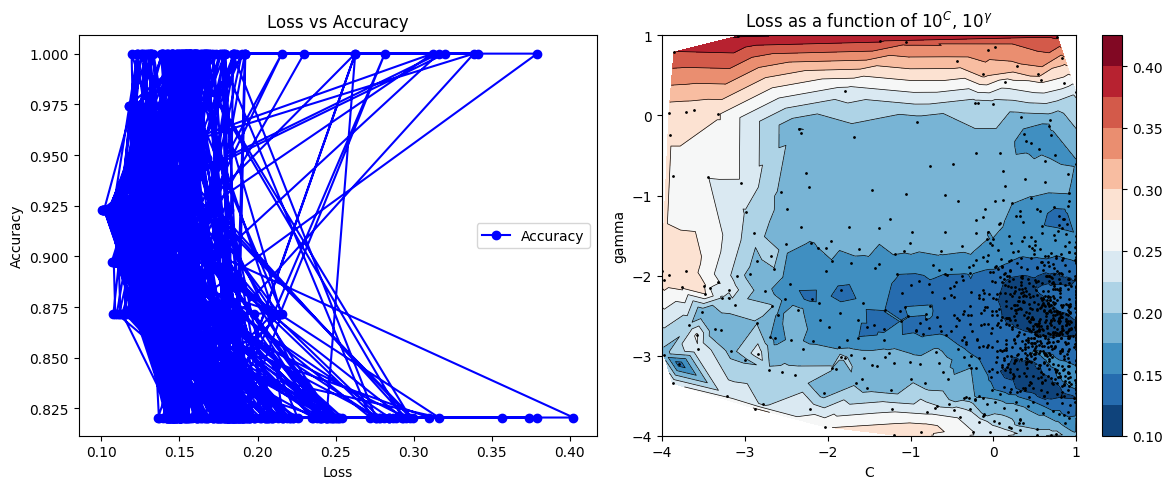

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix
from hyperopt import hp, fmin, tpe, Trials

# Load or prepare your data
# X_train, X_test, y_train, y_test = ...

# Define the objective function
#def objective(args):
    #Define the loss function / objective of our model.

    #... (Same as before) ...

  #  return {'params': {'C': C, 'gamma': gamma}, 'loss': loss, 'status': STATUS_OK }



# Extract the best hyperparameters
best_C = best['C']
best_gamma = best['gamma']

# Train the model with the best hyperparameters
best_model = SVC(C=10 ** best_C, gamma=10 ** best_gamma, random_state=12345)
best_model.fit(X_val, y_val)

# Predict on the test/validation set
y_pred = best_model.predict(X_val)

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Visualization using Matplotlib
results = trials.results
ar = np.zeros(shape=(len(results), 3))
for i, r in enumerate(results):
    C = r['params']['C']
    gamma = r['params']['gamma']
    loss = r['loss']
    ar[i] = C, gamma, loss

C_values, gamma_values, loss_values = ar[:, 0], ar[:, 1], ar[:, 2]

# Calculate accuracy for each combination of C and gamma
accuracy_array = []
for i in range(len(results)):
    C = 10 ** C_values[i]
    gamma = 10 ** gamma_values[i]
    model = SVC(C=C, gamma=gamma, random_state=12345)
    model.fit(X_val, y_val)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracy_array.append(acc)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Alternative Visualization: Line Plot of Loss vs Accuracy
ax1.plot(loss_values, accuracy_array, marker='o', color='b', label='Accuracy')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Accuracy')
ax1.set_title('Loss vs Accuracy')
ax1.legend()

# Plot loss visualization
ax2.tricontour(C_values, gamma_values, loss_values, levels=14, linewidths=0.5, colors='k')
cntr = ax2.tricontourf(C_values, gamma_values, loss_values, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax2)
ax2.plot(C_values, gamma_values, 'ko', ms=1)
ax2.set(xlim=(-4, 1), ylim=(-4, 1))
ax2.set_title('Loss as a function of $10^C$, $10^\gamma$')
ax2.set_xlabel('C')
ax2.set_ylabel('gamma')

plt.tight_layout()
plt.show()


#2 Random Forest Classifier:

In [52]:
def objective(args):
    '''Define the loss function / objective of our model using a Random Forest classifier.

    We will be using a Random Forest parameterized by the number of estimators (n_estimators)
    and the maximum depth of each tree (max_depth).
    '''
    n_estimators, max_depth = args
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=12345)
    loss = 1 - cross_val_score(estimator=model, X=X_train, y=y_train, scoring='roc_auc', cv=3).mean()
    return {'params': {'n_estimators': n_estimators, 'max_depth': max_depth}, 'loss': loss, 'status': STATUS_OK }


In [53]:
# Trials object to store optimization results
trials = Trials()

# Hyperparameter tuning using Hyperopt
best = fmin(objective,
    space=[hp.quniform('n_estimators', 50, 500, 1), hp.quniform('max_depth', 1, 20, 1)],
    algo=tpe.suggest,
    max_evals=300,
    trials=trials)

# Extract the best hyperparameters
best_n_estimators = int(best['n_estimators'])
best_max_depth = int(best['max_depth'])

100%|██████████| 1000/1000 [21:22<00:00,  1.28s/trial, best loss: 0.02308594464464908]


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


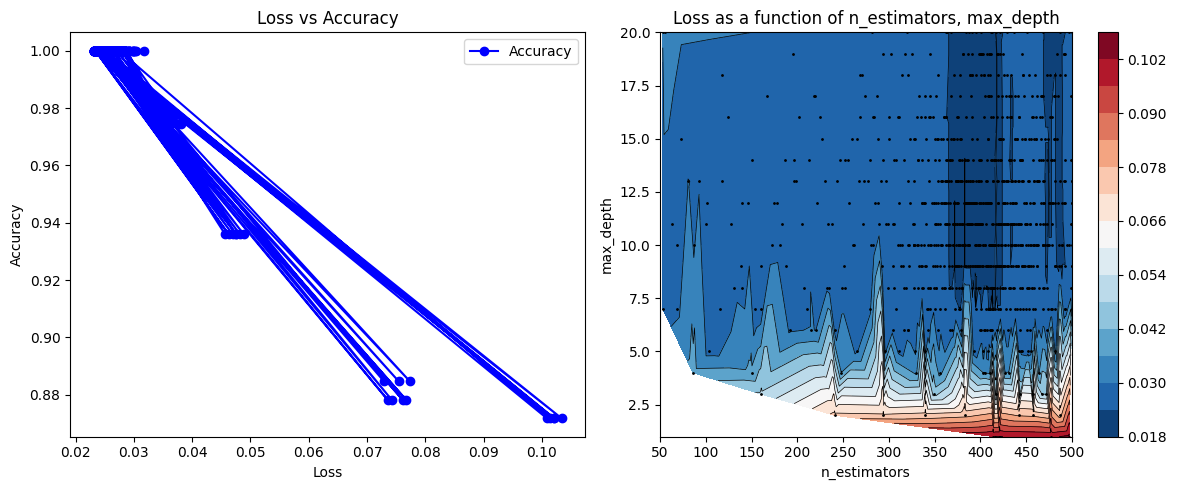

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from hyperopt import hp, fmin, tpe, Trials





# Train the model with the best hyperparameters
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=12345)
best_model.fit(X_train, y_train)

# Predict on the train set
y_pred = best_model.predict(X_train)

# Calculate performance metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_train, y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_train, y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Visualization using Matplotlib
results = trials.results
ar = np.zeros(shape=(len(results), 3))
for i, r in enumerate(results):
    n_estimators = r['params']['n_estimators']
    max_depth = r['params']['max_depth']
    loss = r['loss']
    ar[i] = n_estimators, max_depth, loss

n_estimators_values, max_depth_values, loss_values = ar[:, 0], ar[:, 1], ar[:, 2]

# Calculate accuracy for each combination of n_estimators and max_depth
accuracy_array = []
for i in range(len(results)):
    n_estimators = int(n_estimators_values[i])
    max_depth = int(max_depth_values[i])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    accuracy_array.append(acc)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Alternative Visualization: Line Plot of Loss vs Accuracy
ax1.plot(loss_values, accuracy_array, marker='o', color='b', label='Accuracy')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Accuracy')
ax1.set_title('Loss vs Accuracy')
ax1.legend()

# Plot loss visualization
ax2.tricontour(n_estimators_values, max_depth_values, loss_values, levels=14, linewidths=0.5, colors='k')
cntr = ax2.tricontourf(n_estimators_values, max_depth_values, loss_values, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax2)
ax2.plot(n_estimators_values, max_depth_values, 'ko', ms=1)
ax2.set(xlim=(50, 500), ylim=(1, 20))
ax2.set_title('Loss as a function of n_estimators, max_depth')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('max_depth')

plt.tight_layout()
plt.show()


ADDITION extra


In [15]:


# Extract the best hyperparameters
best_C = best['C']
best_gamma = best['gamma']

# Train the model with the best hyperparameters
best_model = SVC(C=10 ** best_C, gamma=10 ** best_gamma, random_state=12345)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualization using Matplotlib
results = trials.results
ar = np.zeros(shape=(len(results), 3))
for i, r in enumerate(results):
    C = r['params']['C']
    gamma = r['params']['gamma']
    loss = r['loss']
    ar[i] = C, gamma, loss

C, gamma, loss = ar[:, 0], ar[:, 1], ar[:, 2]

##

fig, ax = plt.subplots(nrows=1)
ax.tricontour(C, gamma, loss, levels=14, linewidths=0.5, colors='k')
cntr = ax.tricontourf(C, gamma, loss, levels=14, cmap="RdBu_r")

fig.colorbar(cntr, ax=ax)
ax.plot(C, gamma, 'ko', ms=1)
ax.set(xlim=(-4, 1), ylim=(-4, 1))
plt.title('Loss as a function of $10^C$, $10^\gamma$')
plt.xlabel('C')
plt.ylabel('gamma')

plt.show()


NameError: ignored

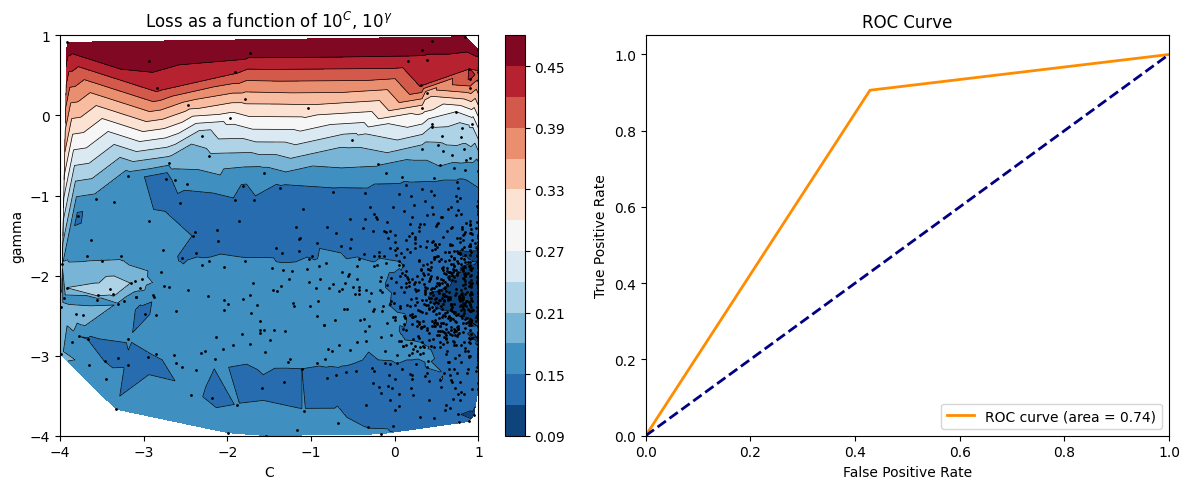

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))



roc_auc = roc_auc_score(y_test, y_pred)

# Plot loss visualization
ax1.tricontour(C, gamma, loss, levels=14, linewidths=0.5, colors='k')
cntr = ax1.tricontourf(C, gamma, loss, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax1)
ax1.plot(C, gamma, 'ko', ms=1)
ax1.set(xlim=(-4, 1), ylim=(-4, 1))
ax1.set_title('Loss as a function of $10^C$, $10^\gamma$')
ax1.set_xlabel('C')
ax1.set_ylabel('gamma')

# Plot ROC-AUC visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# Calculate accuracy for each combination of C and gamma
accuracy_array = []
for i in range(len(results)):
    C = 10 ** C[i]
    gamma = 10 ** gamma[i]
    model = SVC(C=C, gamma=gamma, random_state=12345)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_array.append(acc)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot loss vs accuracy
ax1.scatter(loss, accuracy_array, c='b', marker='o', label='Accuracy')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Accuracy')
ax1.set_title('Loss vs Accuracy')
ax1.legend()

# Plot loss visualization
ax2.tricontour(C, gamma, loss, levels=14, linewidths=0.5, colors='k')
cntr = ax2.tricontourf(C, gamma, loss, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax2)
ax2.plot(C, gamma, 'ko', ms=1)
ax2.set(xlim=(-4, 1), ylim=(-4, 1))
ax2.set_title('Loss as a function of $10^C$, $10^\gamma$')
ax2.set_xlabel('C')
ax2.set_ylabel('gamma')

plt.tight_layout()
plt.show()

IndexError: ignored

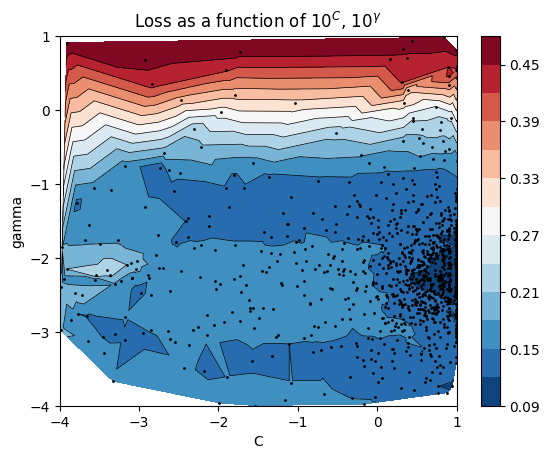

In [ ]:
C, gamma, loss = ar[:, 0], ar[:, 1], ar[:, 2]

fig, ax = plt.subplots(nrows=1)
ax.tricontour(C, gamma, loss, levels=14, linewidths=0.5, colors='k')
cntr = ax.tricontourf(C, gamma, loss, levels=14, cmap="RdBu_r")

fig.colorbar(cntr, ax=ax)
ax.plot(C, gamma, 'ko', ms=1)
ax.set(xlim=(-4, 1), ylim=(-4, 1))
plt.title('Loss as a function of $10^C$, $10^\gamma$')
plt.xlabel('C')
plt.ylabel('gamma')

plt.show()

IndexError: ignored

Brute-Force evaluation of objective function

In [ ]:
def sample_loss(args):
    C, gamma = args
    model = SVC(C=10 ** C, gamma=10 ** gamma, random_state=12345)
    loss = 1 - cross_val_score(estimator=model, X=X_train, y=y_train, scoring='roc_auc', cv=3).mean()
    return loss

lambdas = np.linspace(1, -4, 25)
gammas = np.linspace(1, -4, 20)
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])

real_loss = [sample_loss(params) for params in param_grid]

In [ ]:
# Define your loss function (replace with your own)
def sample_loss(params):
    C = params[0]
    gamma = params[1]

    model = SVC(C=C, gamma=gamma, random_state=42)
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))
    return -accuracy  # Negative sign because we want to maximize

# Define bounds for hyperparameters
bounds = np.array([[0.1, 10], [0.01, 1]])  # Replace with your bounds

# Number of iterations for optimization
n_iters = 10

# Run Bayesian optimization
xp, yp = bayesian_optimisation(n_iters=n_iters, sample_loss=sample_loss, bounds=bounds)

# Get the best hyperparameters
best_hyperparameters = xp[np.argmin(yp)]

# Train the model with the best hyperparameters
best_model = SVC(C=best_hyperparameters[0], gamma=best_hyperparameters[1], random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the best model's performance
y_val_pred = best_model.predict(X_val)
f1 = f1_score(y_val, y_val_pred, average='macro')
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
accuracy = accuracy_score(y_val, y_val_pred)

print("Best Hyperparameters:", best_hyperparameters)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


NameError: ignored

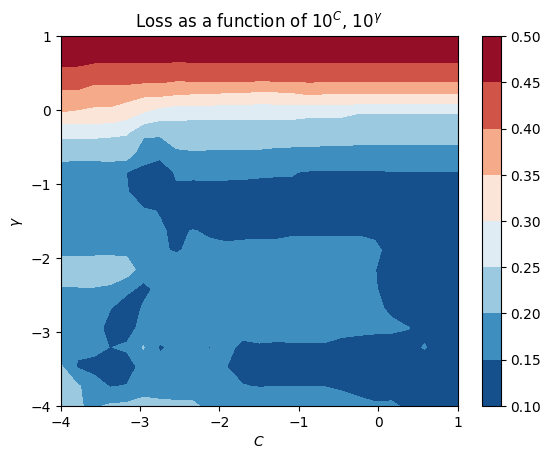

In [ ]:
C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape), cmap="RdBu_r")
plt.colorbar(cp)
plt.title('Loss as a function of $10^C$, $10^\gamma$')
plt.xlabel('$C$')
plt.ylabel('$\gamma$')
plt.show()

Version of previous:

Segment=2 of bayesian optimization

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from GPyOpt.methods import BayesianOptimization
import matplotlib.pyplot as plt


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function to optimize (cross-validation accuracy)
def logistic_regression_objective_function(params):
    C = params[0]

    model = LogisticRegression(C=C, random_state=42)

    # Use cross-validation accuracy as the objective to maximize
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    precision = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro'))
    f1 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro'))

    return -accuracy  # Negative sign because we want to maximize

def random_forest_objective_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Use cross-validation accuracy as the objective to maximize
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    precision = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro'))
    f1 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro'))

    return -accuracy  # Negative sign because we want to maximize

# Define the hyperparameter search space for Logistic Regression
logreg_domain = [{'name': 'C', 'type': 'continuous', 'domain': (0.1, 10)}]

# Define the hyperparameter search space for Random Forest
rf_domain = [{'name': 'n_estimators', 'type': 'discrete', 'domain': (10, 100)},
             {'name': 'max_depth', 'type': 'discrete', 'domain': (3, 20)}]

# Create the Bayesian Optimization objects
logreg_optimizer = BayesianOptimization(f=logistic_regression_objective_function, domain=logreg_domain, acquisition_type='EI')
rf_optimizer = BayesianOptimization(f=random_forest_objective_function, domain=rf_domain, acquisition_type='EI')

# Run the optimization loops for a certain number of iterations
max_iter = 10
logreg_optimizer.run_optimization(max_iter=max_iter)
rf_optimizer.run_optimization(max_iter=max_iter)

# Get the best hyperparameters
best_logreg_params = logreg_optimizer.X[np.argmin(logreg_optimizer.Y)]
best_rf_params = rf_optimizer.X[np.argmin(rf_optimizer.Y)]

# Print the best results
best_logreg_accuracy = -logreg_optimizer.Y[np.argmin(logreg_optimizer.Y)]
best_rf_accuracy = -rf_optimizer.Y[np.argmin(rf_optimizer.Y)]

print("Best Logistic Regression Hyperparameters:", best_logreg_params)
print("Best Random Forest Hyperparameters:", best_rf_params)
print("Best Logistic Regression Accuracy:", best_logreg_accuracy)
print("Best Random Forest Accuracy:", best_rf_accuracy)


ValueError: ignored

Segment-3

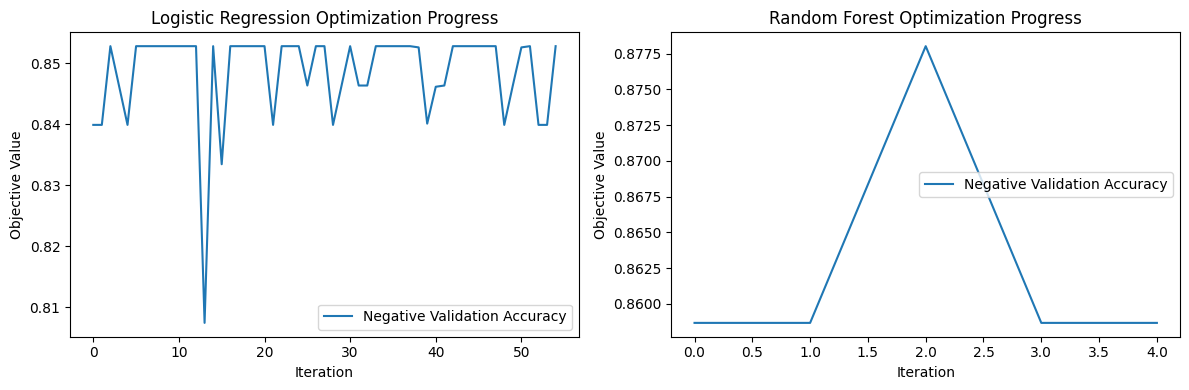

Best Logistic Regression Hyperparameters: [7.27177985]
Best Random Forest Hyperparameters: [10. 20.]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from GPyOpt.methods import BayesianOptimization
import matplotlib.pyplot as plt

# Load the dataset

X = data_set.drop(['name', 'status'], axis=1)
y = data_set['status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function to optimize (cross-validation accuracy)
def logistic_regression_objective_function(params):
    C = params[0, 0]

    model = LogisticRegression(C=C, random_state=42)

    # Use cross-validation accuracy as the objective to maximize
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))

    return -accuracy  # Negative sign because we want to maximize

def random_forest_objective_function(params):
    n_estimators = int(params[0, 0])
    max_depth = int(params[0, 1])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Use cross-validation accuracy as the objective to maximize
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))

    return -accuracy  # Negative sign because we want to maximize

# Define the hyperparameter search space for Logistic Regression
logreg_domain = [{'name': 'C', 'type': 'continuous', 'domain': (0.1, 10)}]

# Define the hyperparameter search space for Random Forest
rf_domain = [{'name': 'n_estimators', 'type': 'discrete', 'domain': (10, 100)},
             {'name': 'max_depth', 'type': 'discrete', 'domain': (3, 20)}]

# Create the Bayesian Optimization objects
logreg_optimizer = BayesianOptimization(f=logistic_regression_objective_function, domain=logreg_domain, acquisition_type='EI')
rf_optimizer = BayesianOptimization(f=random_forest_objective_function, domain=rf_domain, acquisition_type='EI')

# Run the optimization loops for a certain number of iterations
max_iter = 50
logreg_optimizer.run_optimization(max_iter=max_iter)
rf_optimizer.run_optimization(max_iter=max_iter)


# Get the best hyperparameters
best_logreg_params = logreg_optimizer.X[np.argmin(logreg_optimizer.Y)]
best_rf_params = rf_optimizer.X[np.argmin(rf_optimizer.Y)]


# Plot optimization progress for Logistic Regression
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(-logreg_optimizer.Y, label='Negative Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Logistic Regression Optimization Progress')
plt.legend()

# Plot optimization progress for Random Forest
plt.subplot(1, 2, 2)
plt.plot(-rf_optimizer.Y, label='Negative Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Random Forest Optimization Progress')
plt.legend()

plt.tight_layout()
plt.show()



print("Best Logistic Regression Hyperparameters:", best_logreg_params)
print("Best Random Forest Hyperparameters:", best_rf_params)




# Plot optimization progress for Logistic Regression
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(-logreg_optimizer.Y, label='Negative Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Logistic Regression Optimization Progress')
plt.legend()

# Plot optimization progress for Random Forest
plt.subplot(1, 2, 2)
plt.plot(-rf_optimizer.Y, label='Negative Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Random Forest Optimization Progress')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from GPyOpt.methods import BayesianOptimization
import matplotlib.pyplot as plt

# Load the dataset


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function to optimize (cross-validation accuracy)
def logistic_regression_objective_function(params):
    C = params[0]

    model = LogisticRegression(C=C, random_state=42)

    # Use cross-validation accuracy as the objective to maximize
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5))

    return -acc  # Negative sign because we want to maximize

def random_forest_objective_function(params):
    n_estimators = int(params[0, 42])
    max_depth = int(params[0, 1])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Use cross-validation accuracy as the objective to maximize
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5))

    return -acc  # Negative sign because we want to maximize

# Define the hyperparameter search space for Logistic Regression
logreg_domain = [{'name': 'C', 'type': 'continuous', 'domain': (0.1, 10)}]

# Define the hyperparameter search space for Random Forest
rf_domain = [{'name': 'n_estimators', 'type': 'discrete', 'domain': (10, 100)},
             {'name': 'max_depth', 'type': 'discrete', 'domain': (3, 20)}]

# Create the Bayesian Optimization objects
logreg_optimizer = BayesianOptimization(f=logistic_regression_objective_function, domain=logreg_domain, acquisition_type='EI')
rf_optimizer = BayesianOptimization(f=random_forest_objective_function, domain=rf_domain, acquisition_type='EI')

# Run the optimization loops for a certain number of iterations
max_iter = 10
logreg_optimizer.run_optimization(max_iter=max_iter)
rf_optimizer.run_optimization(max_iter=max_iter)

# Get the best hyperparameters
best_logreg_params = logreg_optimizer.X[np.argmin(logreg_optimizer.Y)]
best_rf_params = rf_optimizer.X[np.argmin(rf_optimizer.Y)]

# Plot optimization progress for Logistic Regression
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(-logreg_optimizer.Y, label='Negative Validation Accuracy')
plt.scatter(np.argmin(logreg_optimizer.Y), np.min(logreg_optimizer.Y), color='red', marker='o', label='Best')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Logistic Regression Optimization Progress')
plt.legend()

# Plot optimization progress for Random Forest
plt.subplot(1, 2, 2)
plt.plot(-rf_optimizer.Y, label='Negative Validation Accuracy')
plt.scatter(np.argmin(rf_optimizer.Y), np.min(rf_optimizer.Y), color='red', marker='o', label='Best')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Random Forest Optimization Progress')
plt.legend()

plt.tight_layout()
plt.show()

print("Best Logistic Regression Hyperparameters:", best_logreg_params)
print("Best Random Forest Hyperparameters:", best_rf_params)


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px



# Plot points on a map to see their geographical dispersion
scatter_map = px.scatter_mapbox(data_set, lat="PPE", lon="DFA", size_max=10,
                                color="RPDE",
                                height=850, width=850,
                                )
scatter_map.update_layout(mapbox_style="stamen-terrain",
                          mapbox_zoom=5,
                          mapbox_center_lat=data_set['PPE'].mean(),
                          mapbox_center_lon=data_set['DFA'].mean())
scatter_map.show()

# Checking the distribution of the target
histogram = px.histogram(data_set['status'], nbins=100,
                         labels={'value': 'status'})
histogram.show()

# Checking the logarithmic distribution of the target
histogram = px.histogram(np.log1p(data_set['status']), nbins=100,
                         labels={'value': 'status'})
histogram.show()


#Version 3

In [ ]:
pip install mango

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Define the objective function for optimization (mean squared error)
def objective_function(params):
    max_depth = int(params['max_depth'])
    n_estimators = int(params['n_estimators'])

    # Create the ExtraTreesRegressor with the given hyperparameters
    model = ExtraTreesRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Define the search space for hyperparameters
search_space = {
    'max_depth': (10, 50),
    'n_estimators': (50, 200)
}

# Initialize the BayesSearchCV optimizer
optimizer = BayesSearchCV(ExtraTreesRegressor(), search_spaces=search_space, n_iter=50, cv=5)

# Perform hyperparameter tuning
optimizer.fit(X, y)

# Get the best hyperparameters
best_params = optimizer.best_params_
print("Best Hyperparameters:")
print(best_params)

# Train the final model using the best hyperparameters
best_max_depth = int(best_params['max_depth'])
best_n_estimators = int(best_params['n_estimators'])
final_model = ExtraTreesRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)
final_model.fit(X_train, y_train)








Best Hyperparameters:
OrderedDict([('max_depth', 35), ('n_estimators', 92)])


ExtraTreesRegressor(max_depth=35, n_estimators=92, random_state=42)

In [ ]:
# Train the final model using the best hyperparameters
best_max_depth = 21
best_n_estimators = 70
final_model = ExtraTreesRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)
final_model.fit(X_train, y_train)


ExtraTreesRegressor(max_depth=21, n_estimators=70, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)



Mean Squared Error on Test Set: 0.05506541077969649
R-squared: 0.626096027696793
Mean Absolute Error: 0.1344322344322344
Root Mean Squared Error: 0.2346602028033226


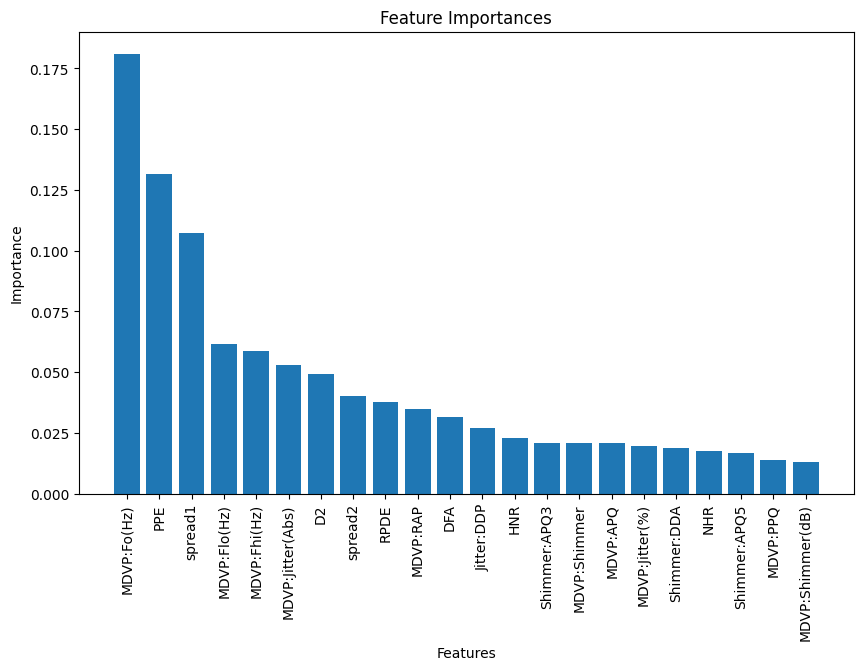

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained the 'final_model' using the best hyperparameters

# Get feature importances from the trained model
feature_importances = final_model.feature_importances_

# Get the names of the features from the original dataset
feature_names = X_train.columns

# Create a DataFrame to store feature importances along with their corresponding names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# For SVM
def objective_function_svm(params):
    C = params['C']
    kernel = params['kernel']

    model = SVR(C=C, kernel=kernel)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = -np.mean(scores)  # Negative mean squared error as skopt minimizes the objective function
    return mse

# For Random Forest
def objective_function_rf(params):
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = -np.mean(scores)  # Negative mean squared error as skopt minimizes the objective function
    return mse


In [ ]:
# For SVM
svm_search_space = {
    'C': (0.1, 10.0),
    'kernel': ['linear', 'rbf', 'poly']
}

# For Random Forest
rf_search_space = {
    'n_estimators': (50, 200),
    'max_depth': (5, 30)
}


In [ ]:
from skopt import BayesSearchCV

# For SVM
svm_optimizer = BayesSearchCV(SVR(), svm_search_space, n_iter=50, cv=5, n_jobs=-1)

# For Random Forest
rf_optimizer = BayesSearchCV(RandomForestRegressor(random_state=42), rf_search_space, n_iter=50, cv=5, n_jobs=-1)


In [ ]:
# For SVM
svm_optimizer.fit(X_train, y_train)
best_params_svm = svm_optimizer.best_params_

# For Random Forest
rf_optimizer.fit(X_train, y_train)
best_params_rf = rf_optimizer.best_params_


In [ ]:
print(best_params_rf)
print(best_params_svm)

OrderedDict([('max_depth', 30), ('n_estimators', 90)])
OrderedDict([('C', 0.32049388976332804), ('kernel', 'linear')])


In [ ]:
C = 0.32049388976332804
kernel = 'linear'

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Extract best hyperparameters for SVR
best_C_svm = best_params_svm['C']
best_kernel_svm = best_params_svm['kernel']

# Extract best hyperparameters for Random Forest
best_n_estimators_rf = best_params_rf['n_estimators']
best_max_depth_rf = best_params_rf['max_depth']

# Train and evaluate SVR with best hyperparameters
best_svm_model = SVR(C=best_C_svm, kernel=best_kernel_svm)
best_svm_model.fit(X_train, y_train)
y_val_pred_svm = best_svm_model.predict(X_val)

svm_mse = mean_squared_error(y_val, y_val_pred_svm)

# Train and evaluate Random Forest with best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_n_estimators_rf, max_depth=best_max_depth_rf, random_state=42)
best_rf_model.fit(X_train, y_train)
y_val_pred_rf = best_rf_model.predict(X_val)

rf_mse = mean_squared_error(y_val, y_val_pred_rf)

# Print the evaluation results
print("SVR Evaluation:")
print("Mean Squared Error:", svm_mse)

print("\nRandom Forest Evaluation:")
print("Mean Squared Error:", rf_mse)


SVR Evaluation:
Mean Squared Error: 0.13025571389662227

Random Forest Evaluation:
Mean Squared Error: 0.05921494143716366


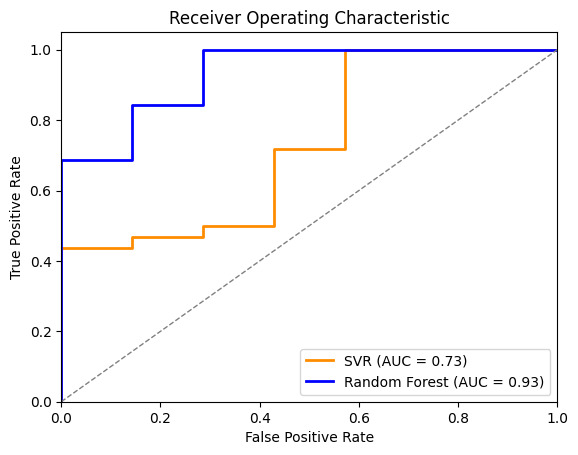

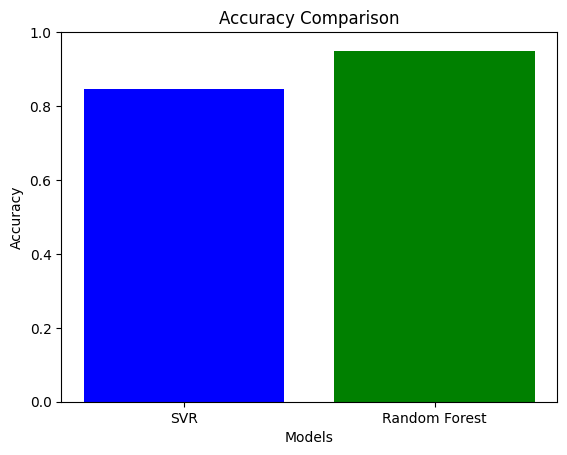

SVR Evaluation:
Accuracy: 0.8461538461538461
F1-score: 0.9090909090909091
Precision: 0.8823529411764706
Recall: 0.9375

Random Forest Evaluation:
Accuracy: 0.9487179487179487
F1-score: 0.9696969696969697
Precision: 0.9411764705882353
Recall: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate the SVR model
y_val_pred_svm_binary = (y_val_pred_svm > 0.5).astype(int)  # Convert predictions to binary for classification
svm_accuracy = accuracy_score(y_val, y_val_pred_svm_binary)
svm_f1 = f1_score(y_val, y_val_pred_svm_binary)
svm_precision = precision_score(y_val, y_val_pred_svm_binary)
svm_recall = recall_score(y_val, y_val_pred_svm_binary)

# Evaluate the Random Forest model
y_val_pred_rf_binary = (y_val_pred_rf > 0.5).astype(int)  # Convert predictions to binary for classification
rf_accuracy = accuracy_score(y_val, y_val_pred_rf_binary)
rf_f1 = f1_score(y_val, y_val_pred_rf_binary)
rf_precision = precision_score(y_val, y_val_pred_rf_binary)
rf_recall = recall_score(y_val, y_val_pred_rf_binary)

# Calculate ROC-AUC for SVR
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate ROC-AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC-AUC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVR (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot accuracy comparison
models = ['SVR', 'Random Forest']
accuracy_scores = [svm_accuracy, rf_accuracy]

plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Print the evaluation metrics
print("SVR Evaluation:")
print("Accuracy:", svm_accuracy)
print("F1-score:", svm_f1)
print("Precision:", svm_precision)
print("Recall:", svm_recall)

print("\nRandom Forest Evaluation:")
print("Accuracy:", rf_accuracy)
print("F1-score:", rf_f1)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
